## Lagrange multipliers

In [1]:
import numpy as np
# import holoviews as hv
# from holoviews import opts
import matplotlib.pyplot as plt
#hv.extension('bokeh')
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In this (brief) notebook, we will solve a very simple but staggeringly intuitive constrained optimization problem, [based on this Khan Academy video](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/finishing-the-intro-lagrange-multiplier-example?modal=1), made by the one and only [3Blue1Brown](https://www.3blue1brown.com/).

### The system. 

For this problem we want to get the maxima of the function 

$$
f(x,y) = x^{2}y
$$

subject to the constraint 

$$
g(x,y) = x^2 + y^2
$$

This is the quintessential example for the use of a Lagrange method to solve constrained maximization problems. In brief, we know that the gradients of the functions are proportional evaluated at the maximum points ($x_{max}, y_{max}$). We can visualize this with the following cartoon

![constrained_opt](../lagrange_cartoon_.png)


[LaTeX was made in this website](https://viereck.ch/latex-to-svg/)

First off, let's visualize the function we have at hand. 

In [3]:
# Initialize points in the XY plane to evaluate
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
xx, yy = np.meshgrid(x,y)

f = xx**2 * yy

r = 1
theta = np.linspace(0, 2 * np.pi, 100)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

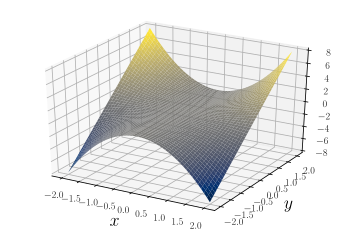

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy, f, cmap = 'cividis')
ax.set_xlabel(r'$x$', fontsize = 18)
ax.set_ylabel(r'$y$', fontsize = 18);

This is a nice way to get a feel of the 3D version of our function $f$, but it's easier to see a contour plot on the xy plane, to get a better sense of its tangency with $g$. 

Text(0, 0.5, '$y$')

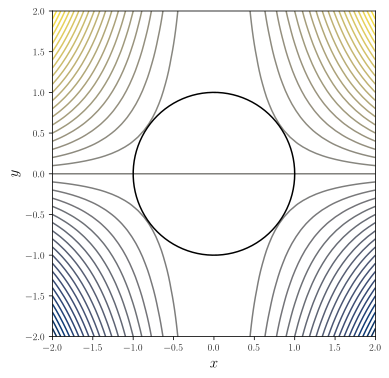

In [11]:
plt.figure(figsize = (5.8,6))
plt.contour(xx, yy, f,levels = 50, cmap = 'cividis', alpha = 0.95, filled = False)
plt.plot(x1, x2, color = 'black')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$y$', fontsize = 15)
#plt.colorbar()

Let's compute the [gradients](https://en.wikipedia.org/wiki/Gradient) of both $f$ and $g$. 


$$
\nabla f = 
    \begin{bmatrix}
        U_f \\ 
        V_f \\ 
    \end{bmatrix} = 
    \begin{bmatrix}
        \frac{\partial f}{\partial x} \\ 
        \frac{\partial f}{\partial y} \\ 
    \end{bmatrix} = 
    \begin{bmatrix}
        2xy\\
        x^2 \\ 
    \end{bmatrix}
$$


$$
\nabla g = 
    \begin{bmatrix}
        U_g \\ 
        V_g \\ 
    \end{bmatrix} = 
    \begin{bmatrix}
        \frac{\partial g}{\partial x} \\ 
        \frac{\partial g}{\partial y} \\ 
    \end{bmatrix} = 
    \begin{bmatrix}
        2x\\
        2y \\ 
    \end{bmatrix}
$$

Now we can go ahead and visualize the gradient vector fields overlaid on the contour plot. We will see that at the point of intersection between the contour of $f$ and $g$, the gradient have the same direction. This means that it these vectors are equal up to a scaling factor, $\lambda$ the Lagrange multiplier. 

In [6]:
# Initialize components of gradients of f and g
U_f = 2*xx*yy
V_f = xx**2

U_g = 2*xx
V_g = 2*yy

Text(0.5, 1.0, '$\\nabla g$')

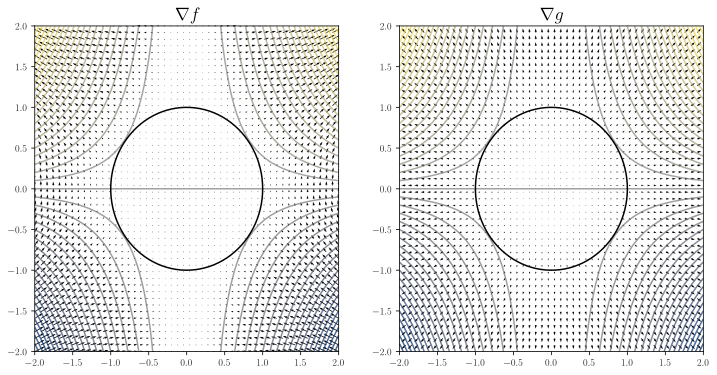

In [9]:
# Make contour plot with gradients overlaid 
fig, ax = plt.subplots(1,2, figsize = (12, 6))
ax[0].contour(xx, yy, f,levels = 50, cmap = 'cividis', alpha = 0.7)
ax[0].plot(x1, x2, color = 'black')
ax[0].quiver(xx, yy, U_f, V_f, units='width')
ax[0].set_title(r'$\nabla f$', fontsize = 18)

ax[1].contour(xx, yy, f,levels = 50, cmap = 'cividis', alpha = 0.7)
ax[1].plot(x1, x2, color = 'black')
ax[1].quiver(xx, yy, U_g, V_g, units='width')
ax[1].set_title(r'$\nabla g$', fontsize = 18);

If we zoom in a bit at the points where $g$ barely kisses  $f$ we will see that indeed the gradients $\nabla f$ and $\nabla g$ point in the same direction.

### The Lagrangian 

The Lagrangian $\nabla \mathcal{L} (x,y, \lambda)$ is a way to "package" up the the system of equations of a constrained optimization problem. 

$$
\nabla \mathcal{L}(x,y, \lambda) = \nabla{f} (x,y) - \lambda \nabla g(x,y)
$$

When we set the $\nabla \mathcal{L}$ = 0 is equivalent to write the whole system we have, where $0$ represents the zero vector. 